# <h1>SYRIATEL CUSTOMER CHURN</h1>

<h2>1. Importing necessary libraries </h2>

In [1]:
#Importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix

<h2>2. Data Loading and Understanding</h2>

In [2]:
#Loading the dataset
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')

In [3]:
#Checking first 5 rows
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## 3.Exploratory Data Analysis (EDA)

This  involves the following processes:

1. Checking for the distribution of the data. 

2. Checking for missing values.

3. Imputing and changing datatypes of specific columns.

4. Numerical Feature Analysis

5. Categorical Feature Analysis

In [4]:
#Checking the distribution
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [5]:
#Checking for the number columns and rows 
df.shape

(3333, 21)

In [6]:
#Checking for missing values in each column
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

There are no missing values in the data, which means we do not have to impute.

In [7]:
#Checking for unique values in each column
for col in df.columns:
    print (col)
    print (df[col].unique())
    print ('')

state
['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']

account length
[128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21 133 224  58  11 109 102 165  18  30 176  47 190 152
  26  69 186 171  28 153 169  13  27   3  42 189 156 134 243 

In [8]:
#Checking summary statistics for numerical data
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### Numerical Feature Analysis
1. Plot Histograms

2. Perform correlation and identify multicollinearity

3. Boxplot to identify outliers

In [9]:
#Creating a dataframe containing numerical features
numerical_cols = df[['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls']]
numerical_cols
        



,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
3329,68,415,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
3330,28,510,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2
3331,184,510,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2


#### 1.Plotting Histograms

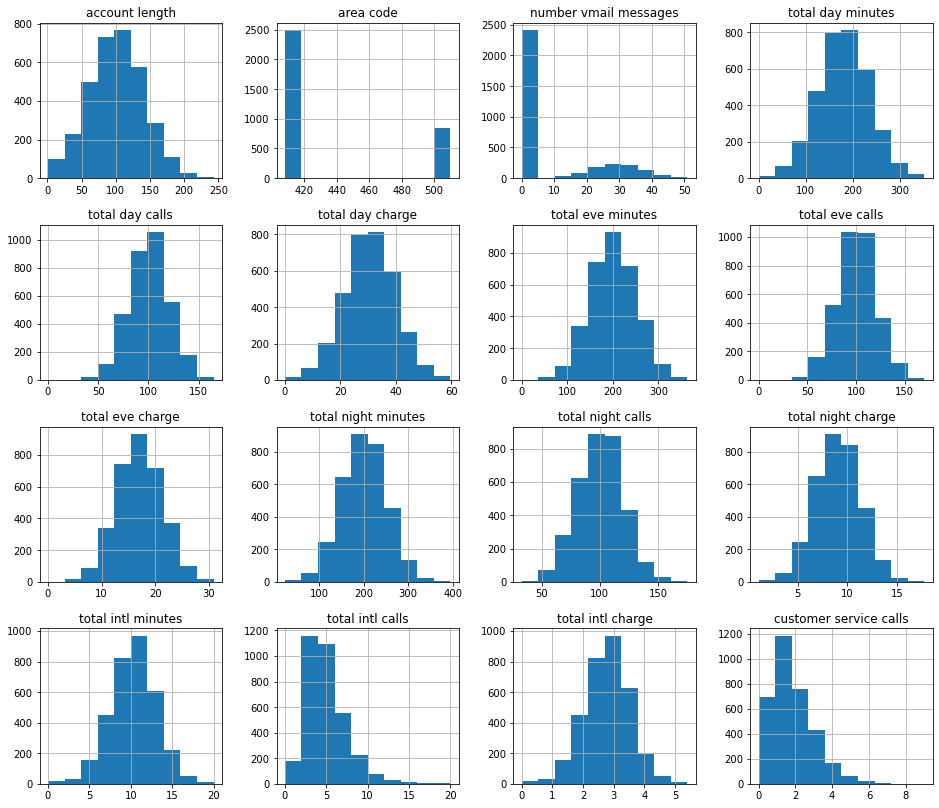

In [10]:
#Plotting histogram to understand the distribution
numerical_cols.hist(figsize =(16,14))
plt.show()

#### 2. Boxplots to identify outliers

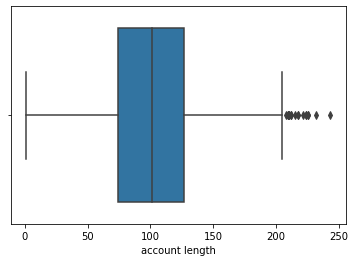

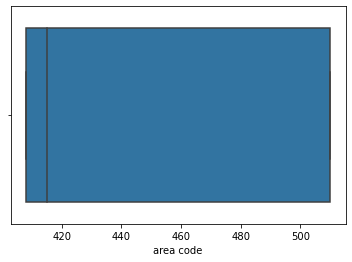

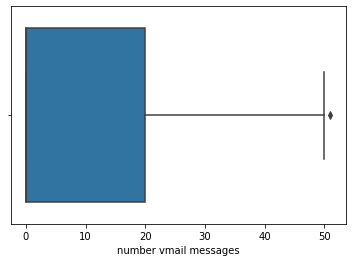

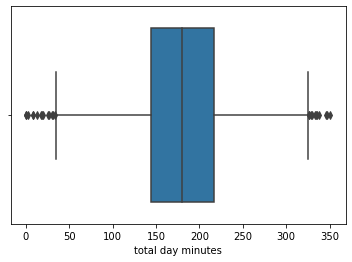

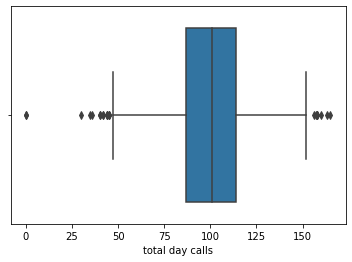

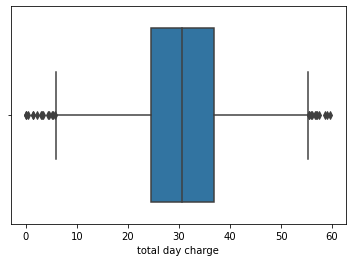

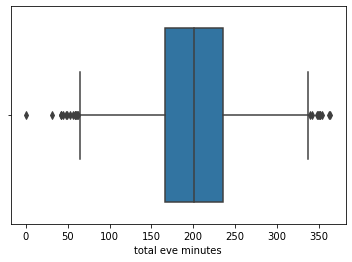

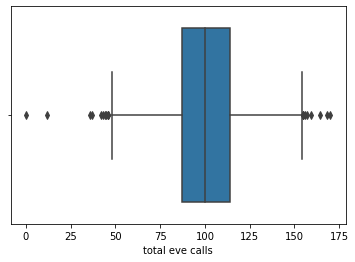

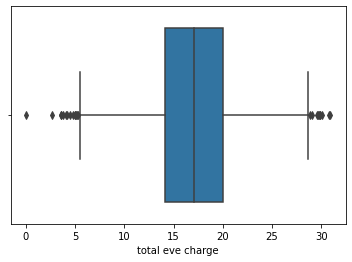

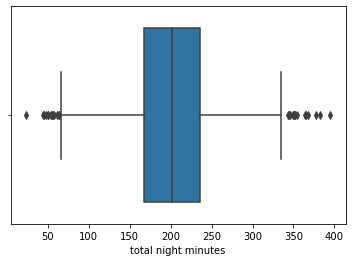

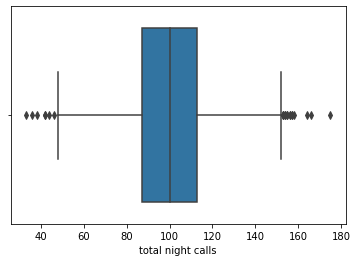

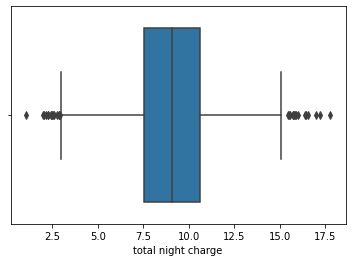

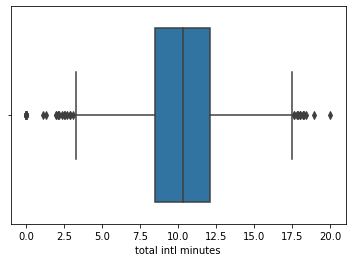

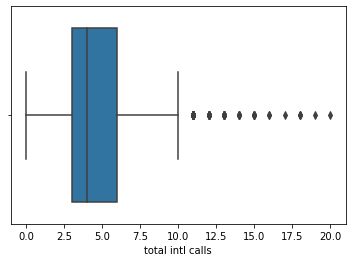

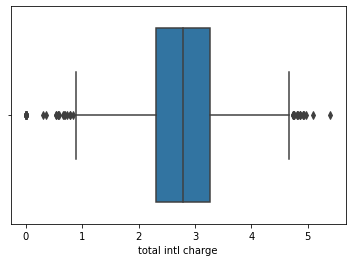

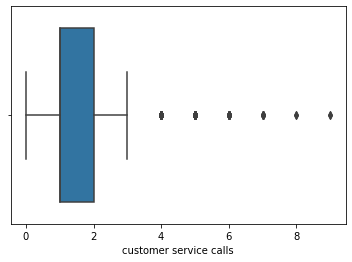

In [11]:
#Plotting Boxplots for each numerical column
for col in numerical_cols.columns:
    
    plt.figure (figsize =(6,4))
    sns.boxplot (x=col, data=numerical_cols)
    plt.show()

#### 3.Correlation Heatmap for numerical columns

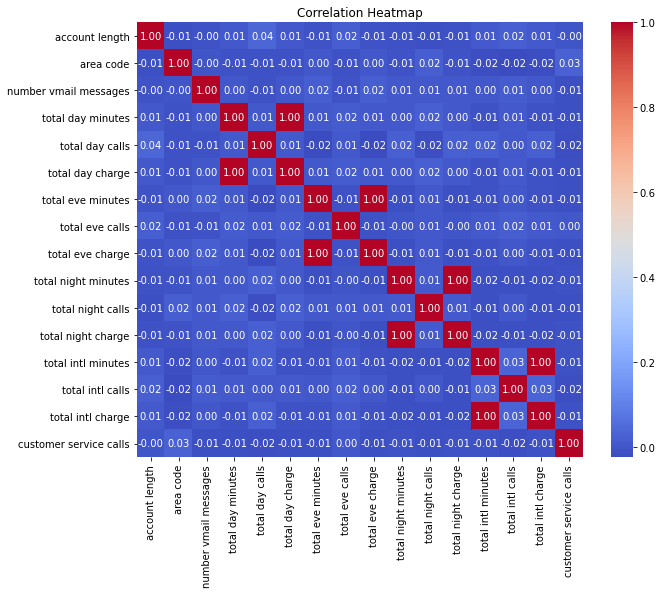

In [12]:
#Plotting a correlation matrix
plt.figure (figsize = (10,8))
sns.heatmap (numerical_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### Categorical Feature Analysis
Involves creating countplots for the categorical data

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [14]:
df.drop(columns=['phone number'], axis=1, inplace=True)

In [15]:
#Creating a dataframe that contains categorical features
object_cols = df.select_dtypes(include='object')
object_cols

,state,international plan,voice mail plan
0,KS,no,yes
1,OH,no,yes
2,NJ,no,no
3,OH,yes,no
4,OK,yes,no
...,...,...,...
3328,AZ,no,yes
3329,WV,no,no
3330,RI,no,no
3331,CT,yes,no


#### Countplots for Categorical Features

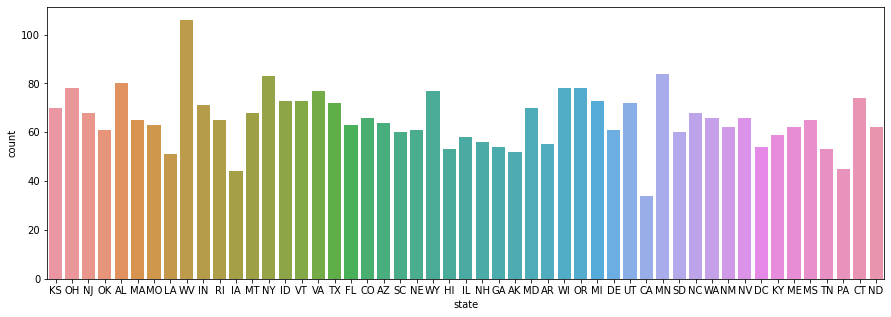

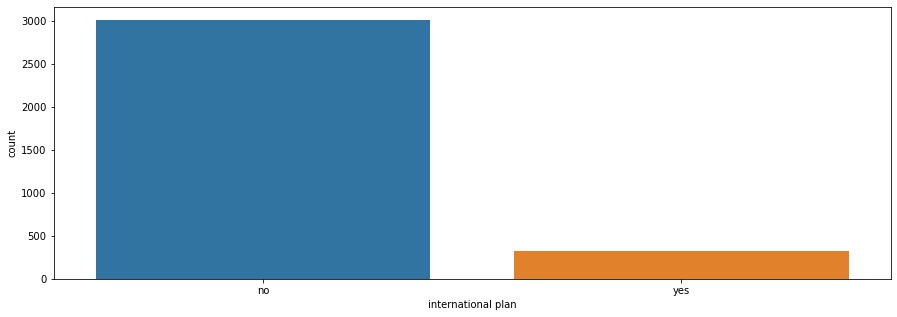

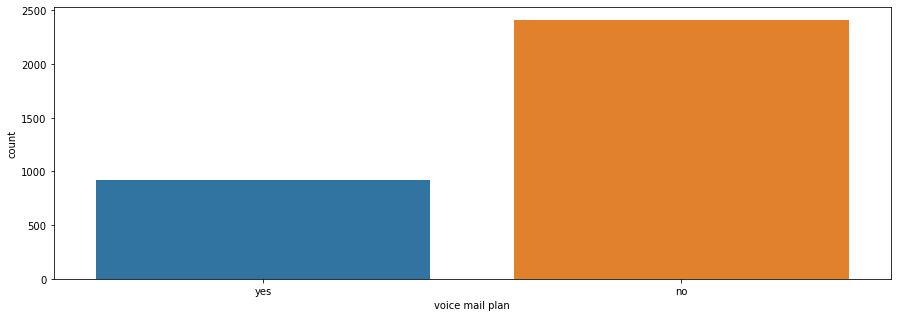

In [16]:
for col in object_cols:
    plt.figure(figsize = (15,5))
    sns.countplot (x=col, data=object_cols)
    plt.show()

#### EDA Conclusions

Dataset is complete with no missing values..

The dataset shows approximately normal distribution in most variables.

Features have very different scales.

Class distribution shows imbalance (majority non-churned customers).

There is multicollinearity detected between related features (minutes and charges).

Outliers are detected but will be kept as they represent valid customer behavior.

## 4.Data Transformation

This step involves:

1. Removing unnecessary features that don't affect the users decision to churn like **State**, **Phone number** and **Area Code**.

2. Transforming categorical variables.

3. Handling multicollinearity

4. Splitting the data

### Removing unnecessary features

In [17]:
#Converting the churn dtpe to int
df['churn'] = df['churn'].astype(int)
df['churn'].dtype

dtype('int32')

In [18]:
#Dropping unnecessary features
df.drop(columns=['state','area code'], axis=1, inplace=True)

df

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,68,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,28,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,184,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


### Transforming categorical variables

In [19]:
#Converting the text data into numbers for to improve model performance
yes_no_mapping = {"yes": 1, "no": 0}
df["international plan"] = df["international plan"].map(yes_no_mapping)
df["voice mail plan"] = df["voice mail plan"].map(yes_no_mapping)

In [20]:
df

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,68,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,28,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,184,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


### Handling Multicollinearity
This invloves dropping highly correlated features.

In [21]:
columns = ['total intl minutes', 'total day minutes', 'total night minutes', 'total eve minutes']
df.drop(columns, axis = 1, inplace = True)

In [22]:
df

,account length,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,churn
0,128,0,1,25,110,45.07,99,16.78,91,11.01,3,2.70,1,0
1,107,0,1,26,123,27.47,103,16.62,103,11.45,3,3.70,1,0
2,137,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0
3,84,1,0,0,71,50.90,88,5.26,89,8.86,7,1.78,2,0
4,75,1,0,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,0,1,36,77,26.55,126,18.32,83,12.56,6,2.67,2,0
3329,68,0,0,0,57,39.29,55,13.04,123,8.61,4,2.59,3,0
3330,28,0,0,0,109,30.74,58,24.55,91,8.64,6,3.81,2,0
3331,184,1,0,0,105,36.35,84,13.57,137,6.26,10,1.35,2,0


### Train and Test Data Split

In [23]:
# splitting the data into training and test sets

X = df.drop('churn', axis=1)
y = df['churn']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 5.Data Modeling

Here we are gonna perform the following:

1. Applying Synthetic Minority Oversampling Technique (**SMOTE**) when the y value is imbalanced.

2. Scaling the data for specific models.

3. Models to use and instantiating them.

4. Model training.

5. Model Evaluation.

6. Hyperparameter tuning.

In [24]:
#Checking for the classes in y whether imbalanced or not
print(y_train.value_counts())

0    2284
1     382
Name: churn, dtype: int64


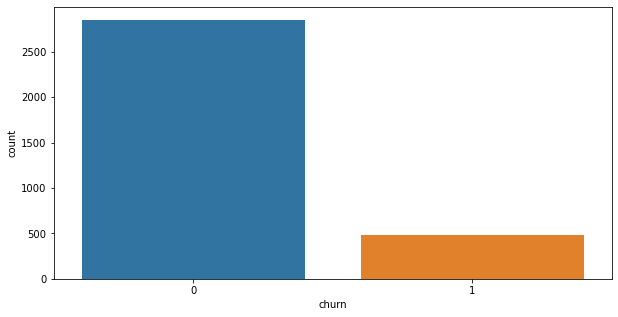

In [25]:
plt.figure(figsize = (10,5))
sns.countplot (x='churn', data=df)
plt.show()

### SMOTE + Undersampling
Since the dataset is highly imbalanced, the model might struggle to predict the minority class, therefore we apply **SMOTE** to balance the dataset by generating synthetic smples for the minority class.

As well undersampling to avoid synthetic data dominating

This will improve model performance and prevent overfitting.

In [26]:
#smote+undersampling

smote = SMOTE(sampling_strategy=0.5, random_state=42)  
undersample = RandomUnderSampler(sampling_strategy=0.5, random_state=42)

#Applying the resampling steps
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
X_resampled, y_resampled = undersample.fit_resample(X_resampled, y_resampled)

#ensuring X_resampled is a Pandas DataFrames
X_resampled = pd.DataFrame(X_resampled, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)


### Scaling

In [27]:
#standardizing features for logistic regression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_resampled), columns=X.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X.columns)


### Models to use
1. Logistic Regression

2. Random Forest

In [28]:
#defining models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

### Model Training and Evaluation under default parameters

###  1.Logistic Regression

In [29]:
#performing logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_resampled)
y_pred = logistic_model.predict(X_test_scaled)

# Evaluation Metrics
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Logistic Regression:
Accuracy: 0.8455772113943029
Precision: 0.49206349206349204
Recall: 0.6138613861386139
F1 Score: 0.5462555066079295

Confusion Matrix:
 [[502  64]
 [ 39  62]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.89      0.91       566
           1       0.49      0.61      0.55       101

    accuracy                           0.85       667
   macro avg       0.71      0.75      0.73       667
weighted avg       0.86      0.85      0.85       667



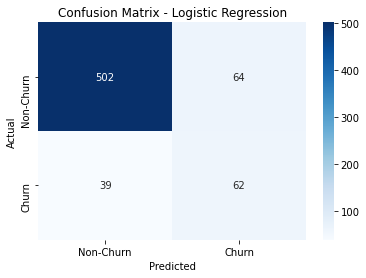

In [30]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Churn", "Churn"], yticklabels=["Non-Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

### 2. RandomForest

In [31]:
# Random Forest 
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_resampled, y_resampled)
y_pred = rf_model.predict(X_test)

# Evaluation Metrics
print("Random Forest (Default Parameters):")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Random Forest (Default Parameters):
Accuracy: 0.9445277361319341
Precision: 0.8555555555555555
Recall: 0.7623762376237624
F1 Score: 0.8062827225130891

Confusion Matrix:
 [[553  13]
 [ 24  77]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       566
           1       0.86      0.76      0.81       101

    accuracy                           0.94       667
   macro avg       0.91      0.87      0.89       667
weighted avg       0.94      0.94      0.94       667



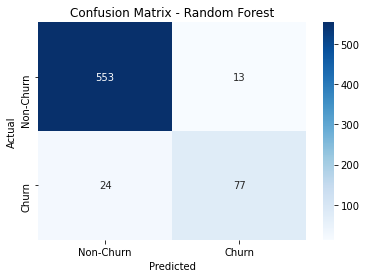

In [32]:
# Compute confusion matrix for Random Forest predictions
cm_rf = confusion_matrix(y_test, y_pred)  

# Create heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Churn", "Churn"], yticklabels=["Non-Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

### Findings
Random Forest is the better choice for the business because it captures more churners (77 vs. 62) and misses fewer churners (24 vs. 39) than Logistic Regression.

Missing fewer churners means the business can take better retention actions, reducing lost revenue.

### Hyperparameter tuning

### 1. Logistic Regression

In [33]:
#hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'class_weight': ['balanced']
}

# Perform GridSearchCV
grid_search = GridSearchCV(
    LogisticRegression(),
    param_grid,
    cv=5,
    scoring='recall',
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_resampled)

# Get best model
best_logistic_model = grid_search.best_estimator_
y_pred_tuned = best_logistic_model.predict(X_test_scaled)

# Print best parameters
print("Best Parameters for Logistic Regression:", grid_search.best_params_)

# Evaluation Metrics
print("\nLogistic Regression (After Hyperparameter Tuning):")
print("Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("Precision:", precision_score(y_test, y_pred_tuned))
print("Recall:", recall_score(y_test, y_pred_tuned))
print("F1 Score:", f1_score(y_test, y_pred_tuned))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_tuned))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tuned))


Best Parameters for Logistic Regression: {'C': 10, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}

Logistic Regression (After Hyperparameter Tuning):
Accuracy: 0.7181409295352323
Precision: 0.3224489795918367
Recall: 0.7821782178217822
F1 Score: 0.4566473988439306

Confusion Matrix:
 [[400 166]
 [ 22  79]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.71      0.81       566
           1       0.32      0.78      0.46       101

    accuracy                           0.72       667
   macro avg       0.64      0.74      0.63       667
weighted avg       0.85      0.72      0.76       667



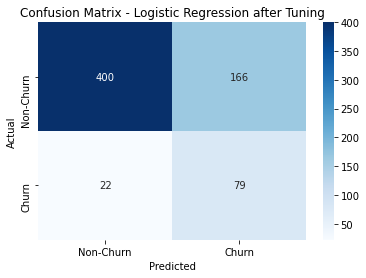

In [34]:
y_pred_log_tuned = best_logistic_model.predict(X_test_scaled)
# Compute confusion matrix
cm_log_tuned = confusion_matrix(y_test, y_pred_log_tuned)

# Create heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm_log_tuned, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Churn", "Churn"], yticklabels=["Non-Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression after Tuning")
plt.show()

### 2. Random Forest

In [35]:


#hyperparameter grid
param_grid = {
    'n_estimators': [200, 500],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [2, 5],
    'class_weight': ['balanced']
}

# Perform GridSearchCV
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='recall',
    n_jobs=-1
)

grid_search.fit(X_resampled, y_resampled)

# Get best model
best_rf_model = grid_search.best_estimator_
y_pred_tuned = best_rf_model.predict(X_test)

# Print best parameters
print("Best Parameters for Random Forest:", grid_search.best_params_)

# Evaluation Metrics
print("\nRandom Forest :")
print("Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("Precision:", precision_score(y_test, y_pred_tuned))
print("Recall:", recall_score(y_test, y_pred_tuned))
print("F1 Score:", f1_score(y_test, y_pred_tuned))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_tuned))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tuned))


Best Parameters for Random Forest: {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 500}

Random Forest :
Accuracy: 0.9415292353823088
Precision: 0.8297872340425532
Recall: 0.7722772277227723
F1 Score: 0.7999999999999999

Confusion Matrix:
 [[550  16]
 [ 23  78]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       566
           1       0.83      0.77      0.80       101

    accuracy                           0.94       667
   macro avg       0.89      0.87      0.88       667
weighted avg       0.94      0.94      0.94       667



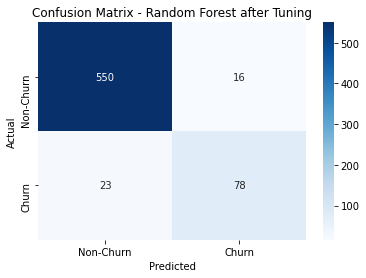

In [36]:
y_pred_rf_tuned = best_rf_model.predict(X_test)

# Compute confusion matrix for Random Forest predictions
cm_rf_tuned = confusion_matrix(y_test, y_pred_rf_tuned)  

# Create heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf_tuned, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Churn", "Churn"], yticklabels=["Non-Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest after Tuning")
plt.show()

## Model Selection for Churn Prediction
After evaluating both Logistic Regression and Random Forest for predicting customer churn, the decision on the best model depends on our key priority: minimizing customer loss while optimizing intervention efforts.

Logistic Regression achieved slightly higher recall (78.2%), meaning it is better at catching actual churners. This makes it a strong choice if the primary goal is to identify and retain as many churners as possible. However, it comes at the cost of high false positives (166 non-churners misclassified), leading to potentially wasted retention efforts.

Random Forest, on the other hand, had a slightly lower recall (77.2%), meaning it missed one extra churner compared to Logistic Regression. However, it significantly reduced false positives (only 16 non-churners misclassified). This means less unnecessary intervention and better use of retention resources.


## Final Decision
Since our goal is to reduce customer loss while ensuring retention efforts are efficient, **Random Forest** is the better choice. While it sacrifices a small fraction of recall, it dramatically reduces false churn predictions, making it a more practical model for optimizing both retention strategy and business resources.

### Feature Importance

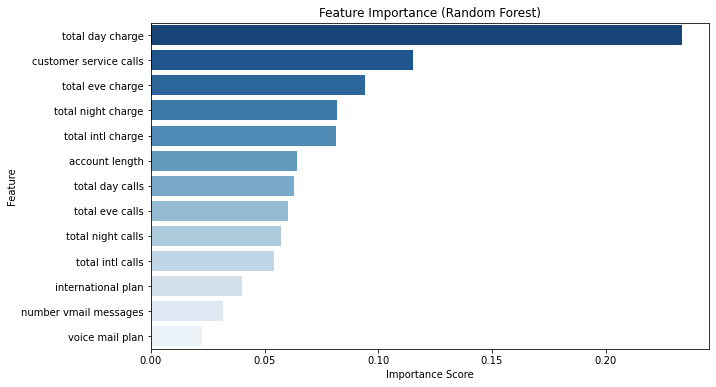

In [37]:
feature_importance = rf_model.feature_importances_

# Create a DataFrame for better visualization
feature_names = X_train.columns  
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

#plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette="Blues_r")
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


### Insights
Total Day Charge is the most significant factor influencing churn.

Customer Service Calls is also highly correlated with churn, meaning customers who call support frequently are more likely to leave.

Other charges (evening, night, and international) and account-related factors (account length, total calls) also contribute but with lower impact.

## CONCLUSION

The **Random Forest model** is the best choice because it predicts customer churn more accurately and helps us understand which factors influence customers to leave. This will allow us to take better actions to reduce churn.

The most influential factors for churn are billing-related metrics (total day charge, total evening charge) and customer dissatisfaction indicators (customer service calls).